# Exercise 4: Data cleansing

This homework assignment is designed to get you comfortable loading and working with data tables.

You will need to download the **LexicalData_toclean.csv** file from the *Homework/lexDat* folder in the class GitHub repository.

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not.

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load the data table from the **LexicalData_toclean.csv** file. Use the `head` function to look at the first few rows of the data.

In [27]:
# Download the data file using gdown (as suggested in the notebook comments)
system("gdown --id 1wSvRPME5NimUDa0t3WqNSGzimLB1uNa7")

# Read the CSV file into a variable
lexdata <- read.csv("LexicalData_toclean.csv")

# Look at the first few rows
head(lexdata)


,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,"1,094",refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


The **LexicalData_toclean.csv** file contains the variables `Sub_ID` (Subject ID), `Trial` (the trial number), `D_RT` (reaction time) and `D_Word` (the word they were responding to).

---
## 2. Data Cleansing (4 points)

There are three things we want to do to make this data more useable:
* Get rid of the commas in the reaction time values, and make this variable numeric (hint: check out the functions `gsub` and `as.numeric`).
* Get rid of rows where the reaction times are missing (hint: you can use the `filter` function from `tidyverse`, but you'll need to load the library).
* Make sure all of the reaction times are positive.

Write code that will copy the data to a new variable and make the above changes.

In [28]:
library(tidyverse)

tidy_lexdata <- lexdata %>%

  # Remove commas and convert D_RT to numeric
  mutate(D_RT = as.numeric(gsub(",", "", D_RT))) %>%
  # Remove rows with missing reaction times
  filter(!is.na(D_RT)) %>%
  # Make sure RTs are positive
  filter(D_RT > 0)

# Look at tidyed up first few rows
head(tidy_lexdata)


,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,1094,refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


For each of the three actions above, is it addressing a data anomaly (as described in the Müller reading)? If so, name the *type* of anomaly it's addressing.

> *Write your response here.*
>> All three are anomalies.
> * First action: Get rid of the commas in the reaction time values = syntax error / anomoly. The commas present the data in a format that isn't even and identical across large/small numbers.
> * Second action: Get rid of rows where the reaction times are missing = a missing values or omission anomaly
> * Third action: Make sure all of the reaction times are positive = this is a constraint; i.e. a reaction time can never be negative so this has to be positive.


---
## 3. Data Manipulation with Tidyverse (4 points)

Now let's use `tidyverse` functions to play around with this data a bit. Use the piping operator (`%>%`) in both of these code cells.

First, let's get some useful summary **statistics** using `summarise`. Output a table that tells us how many observations there are in the data set, as well as the mean and standard deviation of the reaction times.

In [29]:
library(tidyverse)

# Calculate summary statistics using the pipe operator
smry <- tidy_lexdata %>%
  summarise(
    n_observations = n(),
    mean_rt = mean(D_RT),
    sd_rt = sd(D_RT)
  )

smry


n_observations,mean_rt,sd_rt
<int>,<dbl>,<dbl>
62607,807.2667,377.4396


Now, we'll use `mutate` to re-number the trials, starting from 0 instead of 1. Make a new variable that is equal to the `Trial` variable minus one.

In [30]:
# Assign the modified data frame to a variable
tidy_lexdata <- tidy_lexdata %>%  #re-number the trials, starting from 0 instead of 1
    mutate(trial_0 = Trial - 1) %>%
    relocate(trial_0, .before = Trial) #move next to original Trials column for easy comparison

head (tidy_lexdata)




,Sub_ID,trial_0,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>
1,157,0,1,1,710,browse,false,-0.437
2,67,0,1,1,1094,refrigerant,false,0.825
3,120,0,1,1,587,gaining,false,-0.645
4,21,0,1,1,984,cheerless,false,0.025
5,236,0,1,1,577,pattered,false,-0.763
6,236,1,2,1,715,conjures,false,-0.364


---
## 4. Plotting Data (1 point)

Use the `plot()` function to visualize the data, in a way that helps you see if there's a relationship between `D_RT` and your new trial variable.

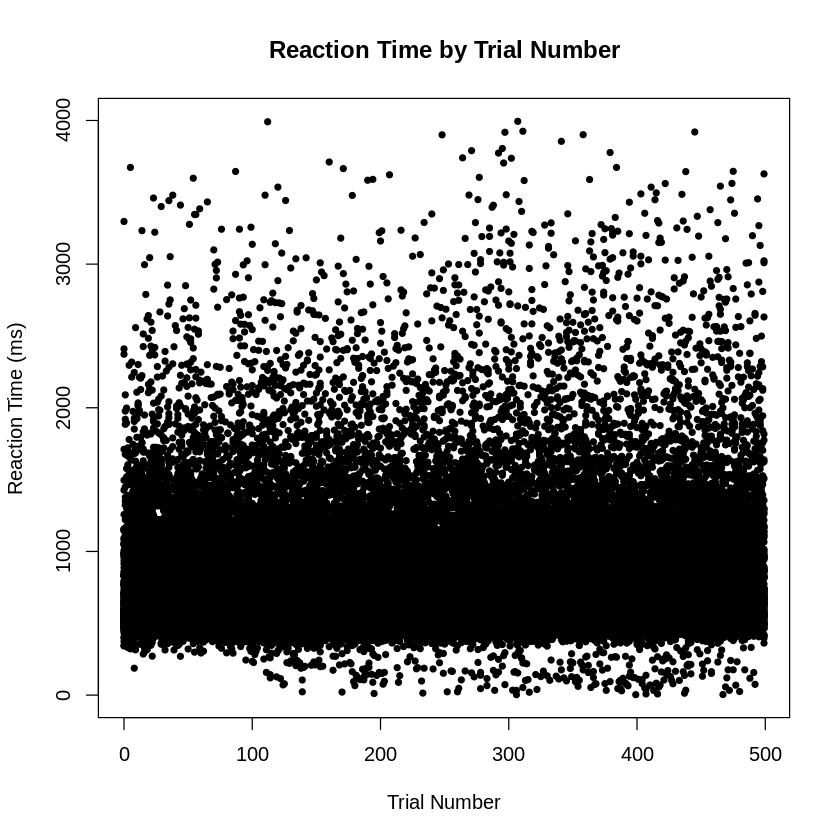

In [26]:
# Plot reaction time vs trial number
plot(tidy_lexdata$trial_0, tidy_lexdata$D_RT,
    xlab = "Trial Number",
    ylab = "Reaction Time (ms)",
    main = "Reaction Time by Trial Number",
    pch = 20)  # pch=20 makes smaller dots for better visibility



That's all for this assignment! When you are finished, save the notebook as Exercise4.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas.

**DUE:** 5pm EST, Feb 10, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *As always, I worked with my tutor, claude.ai*